 # Data plotter
 
 ## Importing dependecies

In [7]:
import os
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt


## Setting some global vairiables

In [8]:
path = "./data"
data_1_name = "detection"
data_2_name = "groundtruth"
file_format = ".csv"
image_name = "plot"
image_format = ".png"
output_folder = "./output/"
image_counter = 1
surface_thresholds = range(0, 300, 50)
complexity_thresholds = range(5)

## Reading data and creating output folder

In [9]:
detection = pd.read_csv(path + "/" + data_1_name + file_format, na_values="-")
groundtruth = pd.read_csv(path + "/" + data_2_name + file_format, na_values="-")

detection_values = detection.values
groundtruth_values = groundtruth.values

headers = detection.columns

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

## Data transforming/plotting functions

In [5]:
def create_ranges(thresholds):
    thresholds_length = len(thresholds)
    interv = [[thresholds[n], thresholds[n+1]] for n in range(thresholds_length) if n < thresholds_length-1]
    interv.append([thresholds[thresholds_length-1], math.inf])
    print(interv)
    return interv


def count_thresholds(ranges, graphtype="2D"):
    col_index = 1 if graphtype == "2D" else (2 if graphtype == "3D" else 3)
    a = detection_values[:, col_index] - groundtruth_values[:, col_index]
    total_values = len(a)
    error_count = np.sum(np.isnan(a))
    a = np.abs(np.where(np.isfinite(a), a, 0))
    result = [(np.count_nonzero((a >= ranges[n][0]) & (a < ranges[n][1]))/total_values)*100 for n in range(len(ranges))]
    result.append(error_count)
    print(result)
    return result


def plot_results(values, labels, tittle="", iscomplexity=False):
    plt.title(tittle)
    if not iscomplexity:
        plt.xlabel('Squared feet error')
    else:
        plt.xlabel('Inches per foot')
    plt.ylabel('Percentage of blueprints')
    plt.bar(range(len(values)), values)
    plt.xticks(range(len(values)), labels)
    plt.ylim([0, 100])
    plt.savefig(output_folder + image_name + str(image_counter) + image_format)
    plt.show()


def ranges_to_string(ranges):
    return ["[" + str(ranges[n][0]) + ", " + str(ranges[n][1]) + ")" for n in range(len(ranges))]

## Data plotting

[[0, 50], [50, 100], [100, 150], [150, 200], [200, 250], [250, inf]]
[34.05017921146953, 14.336917562724013, 8.24372759856631, 6.451612903225806, 3.942652329749104, 32.97491039426524, 20]


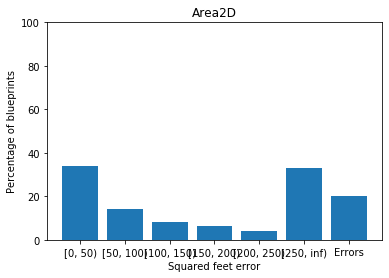

[10.03584229390681, 2.1505376344086025, 1.4336917562724014, 2.5089605734767026, 0.7168458781362007, 83.15412186379928, 20]


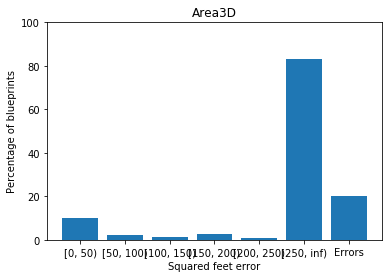

[[0, 1], [1, 2], [2, 3], [3, 4], [4, inf]]
[84.58781362007169, 6.093189964157706, 3.225806451612903, 1.0752688172043012, 5.017921146953405, 20]


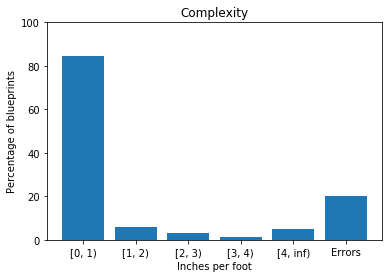

In [6]:
ranges = create_ranges(surface_thresholds)
labels = ranges_to_string(ranges)
labels.append("Errors")
#Plotting 2D
results = count_thresholds(ranges)
plot_results(results, labels, headers[1])
image_counter += 1
#Plotting 3D
results = count_thresholds(ranges, "3D")
plot_results(results, labels, headers[2])
image_counter += 1
#Plotting Complexity
ranges = create_ranges(complexity_thresholds)
labels = ranges_to_string(ranges)
labels.append("Errors")
results = count_thresholds(ranges, "Complexity")
plot_results(results, labels, headers[3], True)